In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import time
import CompMethod as TP

# Loader

In [2]:
datadir = '../Dataset/0307make07/'
print(os.listdir(datadir))

['csi.npy', 'img.npy', '.ipynb_checkpoints', 'csi-wi2vi.npy']


In [3]:
transform = transforms.Compose([
    transforms.Resize([240, 320]),
    transforms.ToTensor()
 ])

# Specify x and y
mydata = TP.MyDataset(
#    datadir + 'csi-wi2vi.npy',
    datadir + 'csi.npy',
                      datadir + 'img.npy',
                      (128, 128),
                     transform,
                     # img='y',
                     # int_image=True
                     )
print(mydata.data['x'].shape, mydata.data['y'].shape)

train_size = int(len(mydata) * 0.8)
valid_size = int(len(mydata) * 0.1)
test_size = int(len(mydata)) - train_size - valid_size
print(train_size, valid_size, test_size)

train_loader, valid_loader, test_loader = TP.split_loader(mydata, train_size, valid_size, test_size, 64)

loaded
(7638, 6, 30, 100) (7638, 1, 128, 128)
6110 763 765
6110 763 765


In [4]:
# Hyperparameters
args = TP.MyArgs(cuda=1, epochs=10, learning_rate=1e-4, criterion=nn.BCELoss(reduction='sum'))

In [5]:
# Model and Loss
wi2vi = TP.Wi2Vi().to(args.device)
ae = TP.AutoEncoder(latent_dim=16).to(args.device)
trainer = TP.CompTrainer(
    wi2vi,
   # ae,
                         args,
                         train_loader, valid_loader, test_loader)

CompModel: epoch=9/10, batch=76/95,loss=2292287.05
Total training time: 283.05875873565674 sec
CompModel: test=76/95, loss=35411.27343755
Test finished. Average loss={'LOSS': 35955.41700310958}


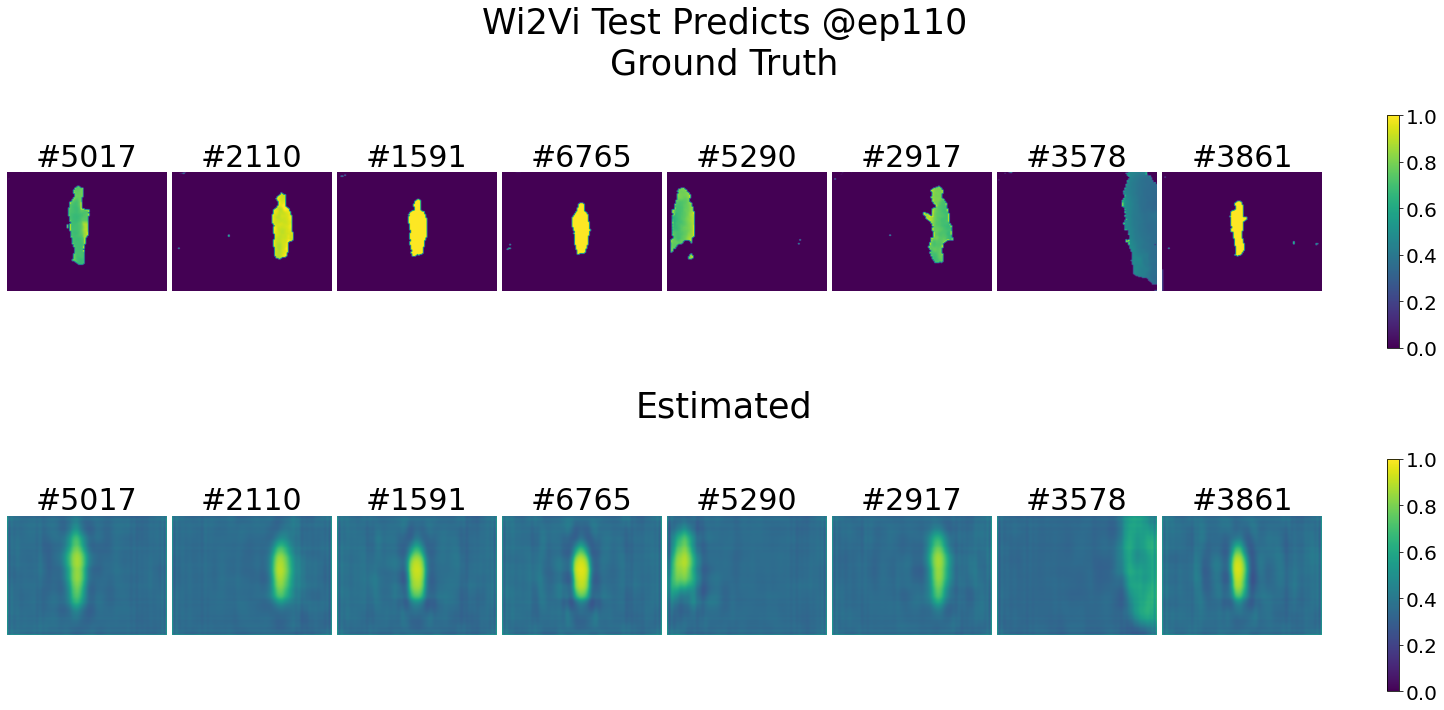

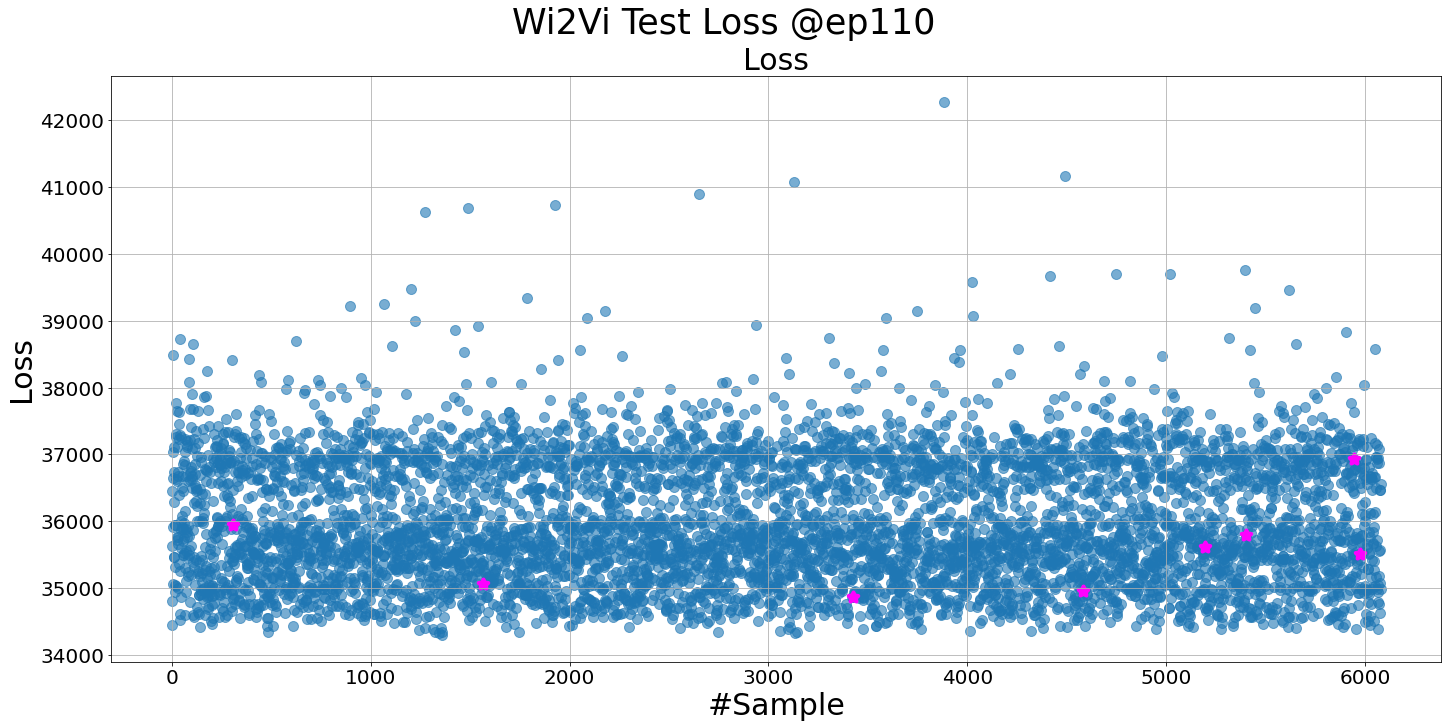

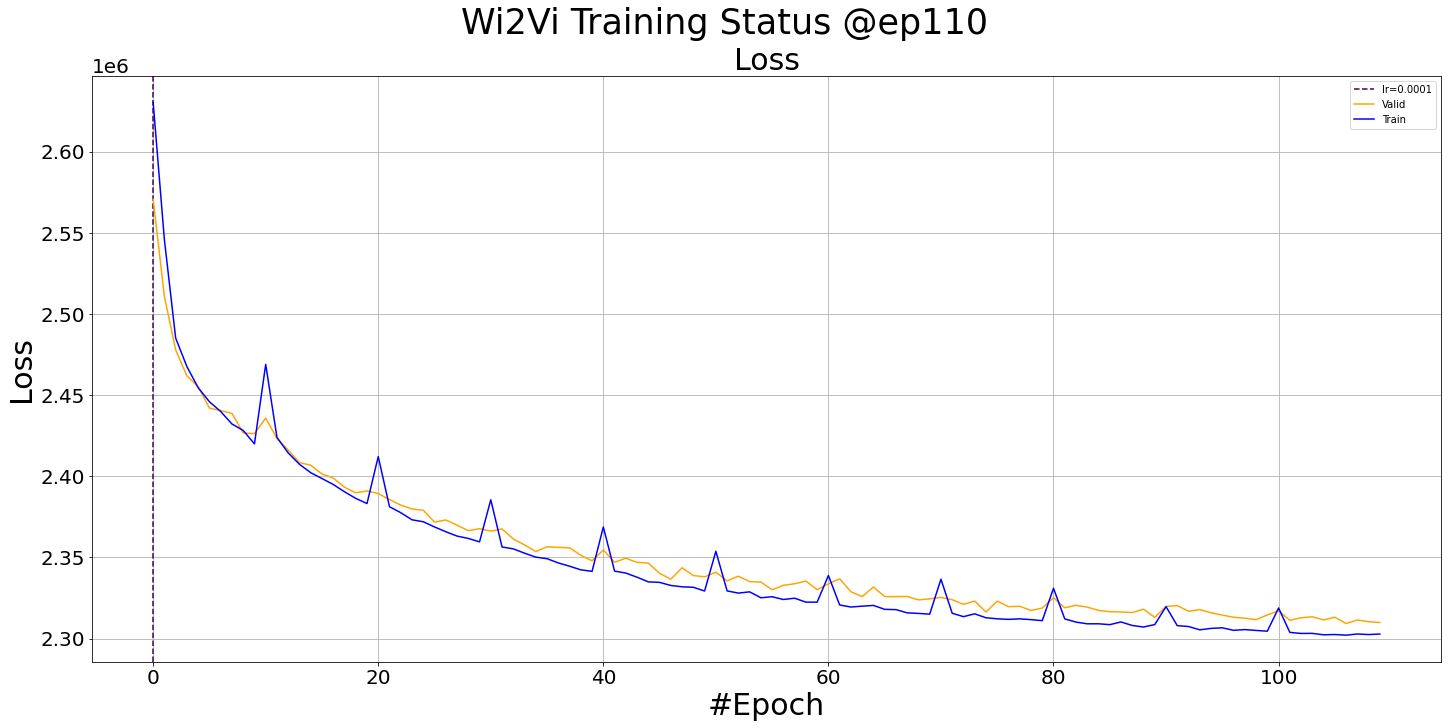

CompModel: epoch=9/10, batch=76/95,loss=2298866.55
Total training time: 283.8880453109741 sec
CompModel: test=76/95, loss=35683.33593755
Test finished. Average loss={'LOSS': 35867.97258814761}


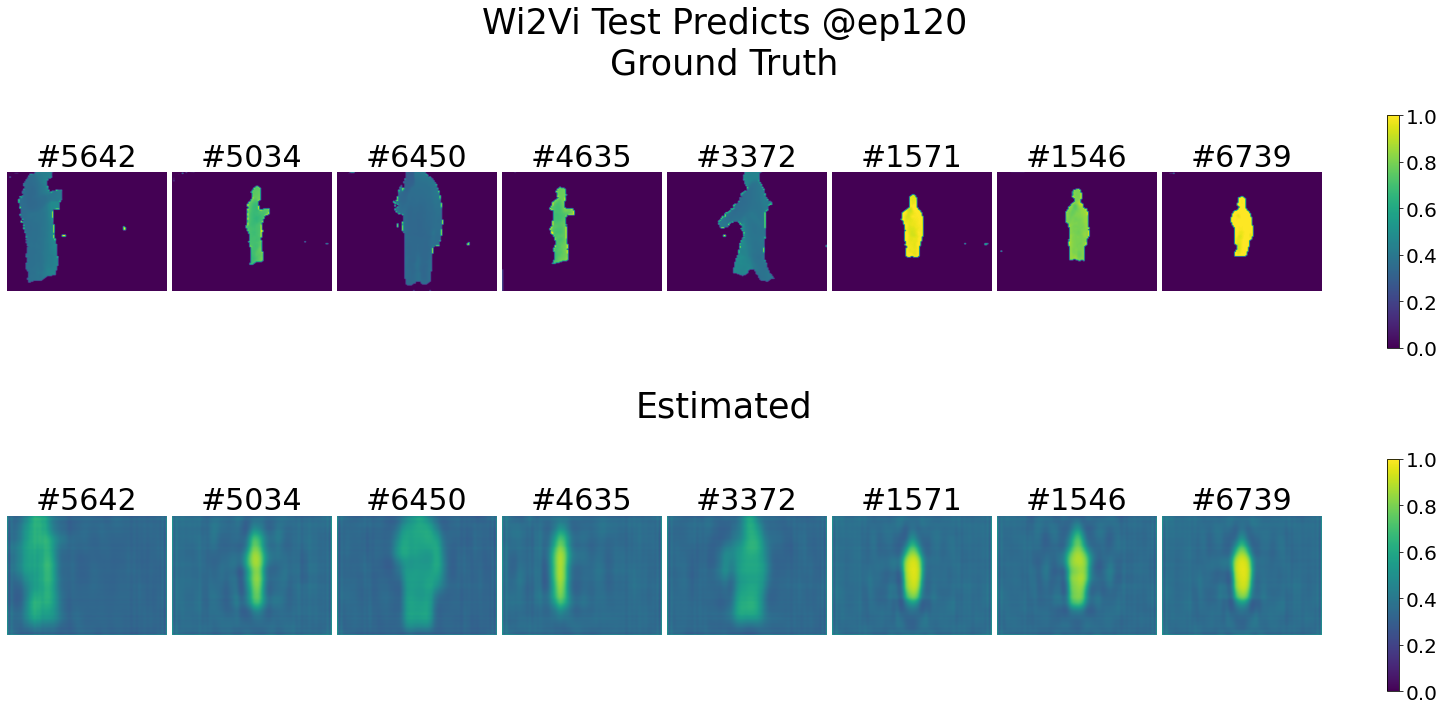

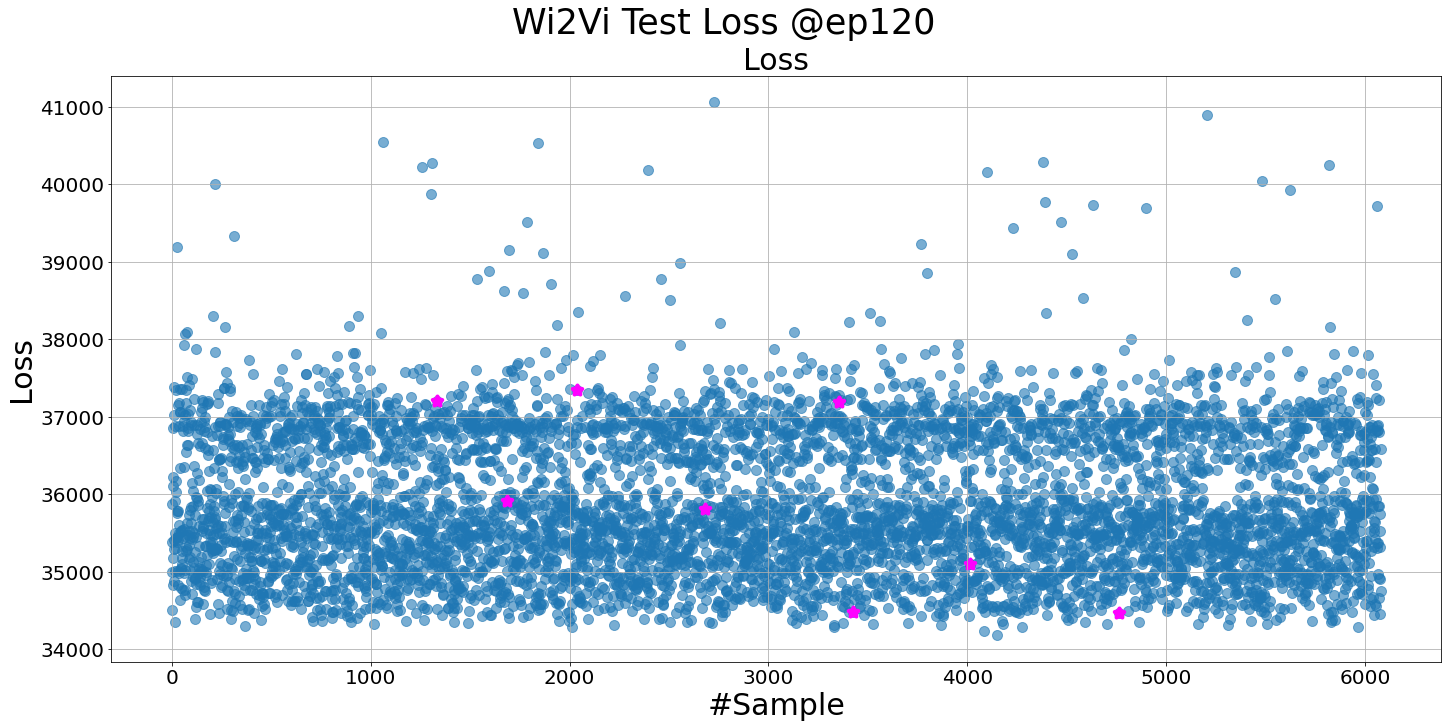

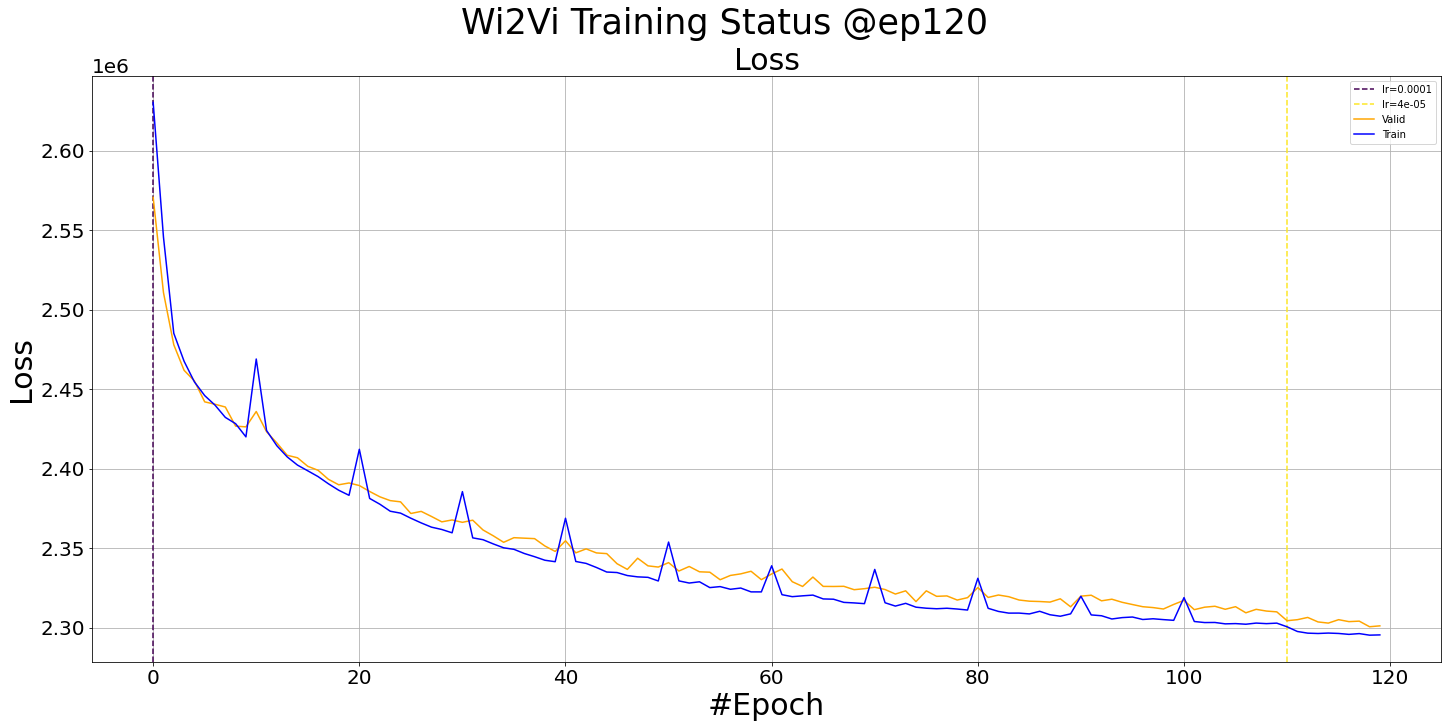

CompModel: epoch=9/10, batch=76/95,loss=2294579.55
Total training time: 283.79929065704346 sec
CompModel: test=76/95, loss=36852.85156255
Test finished. Average loss={'LOSS': 35813.660403603004}


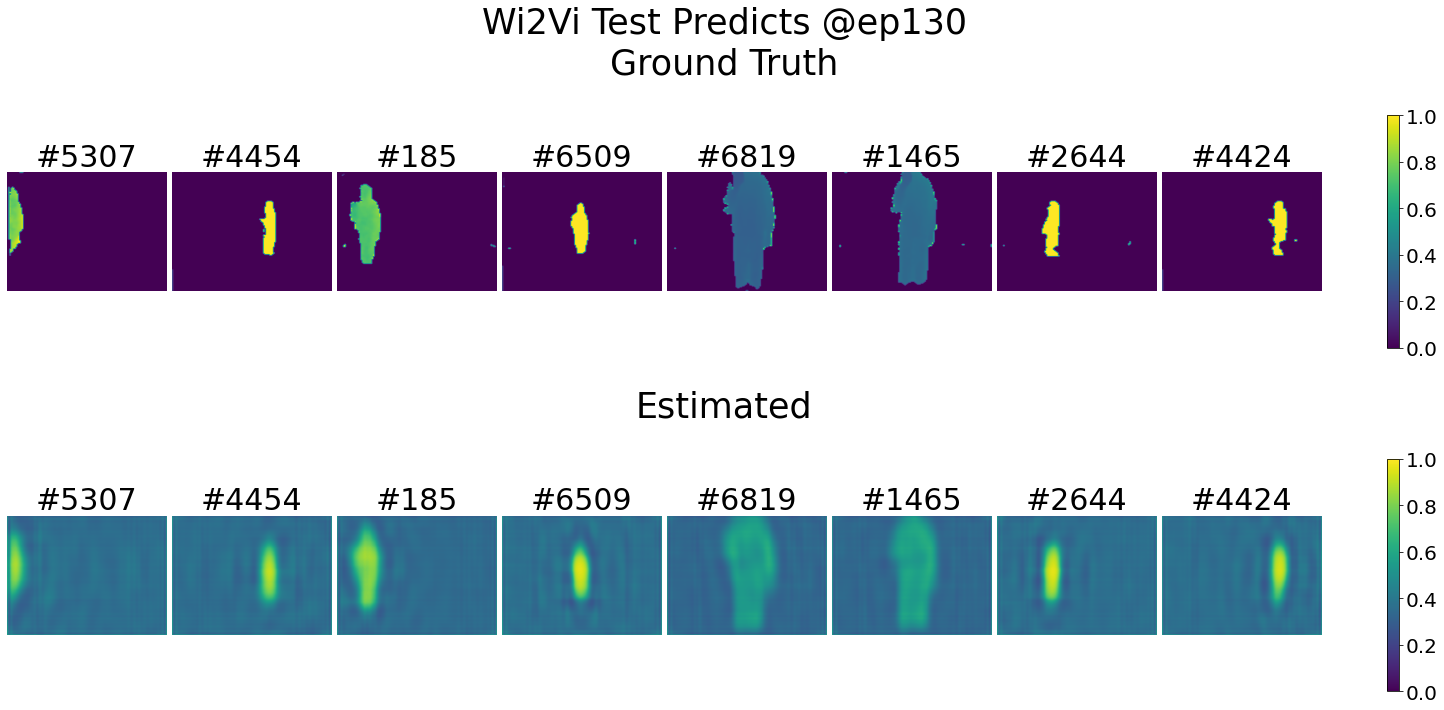

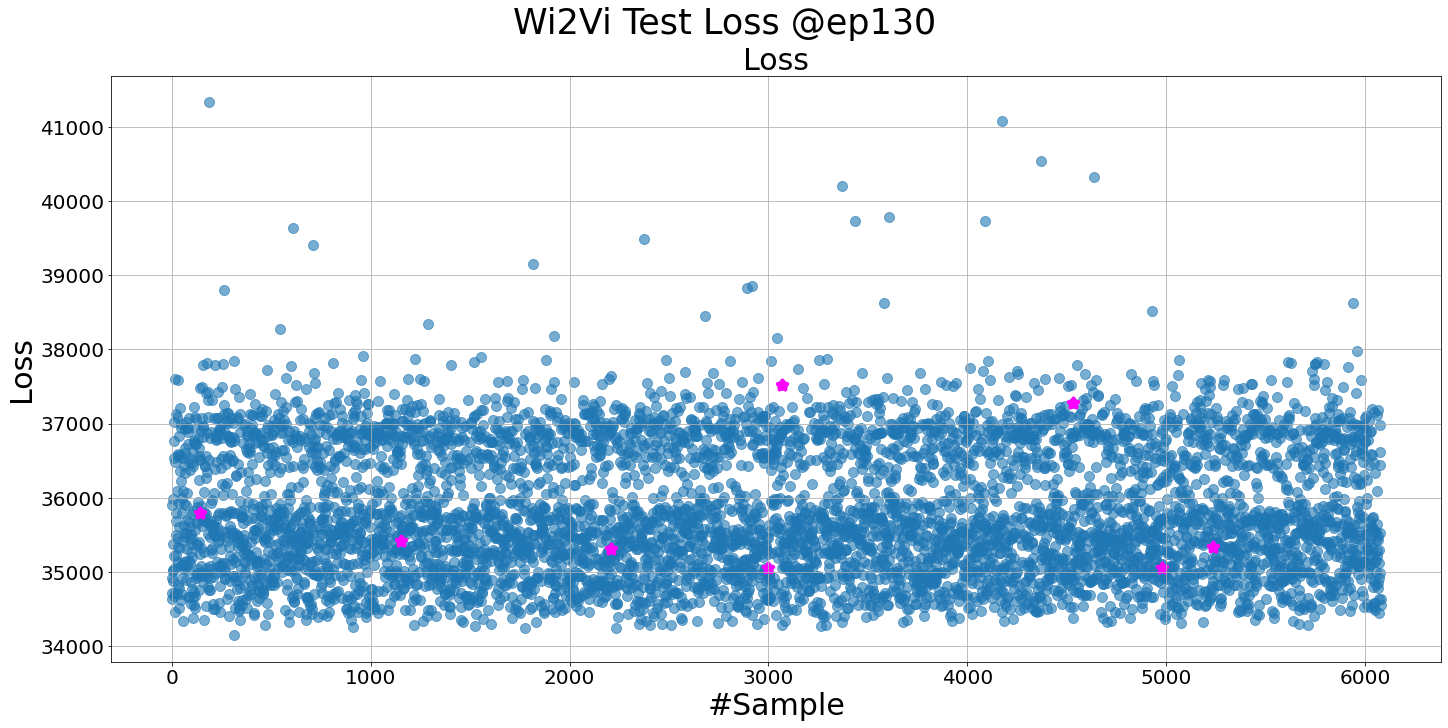

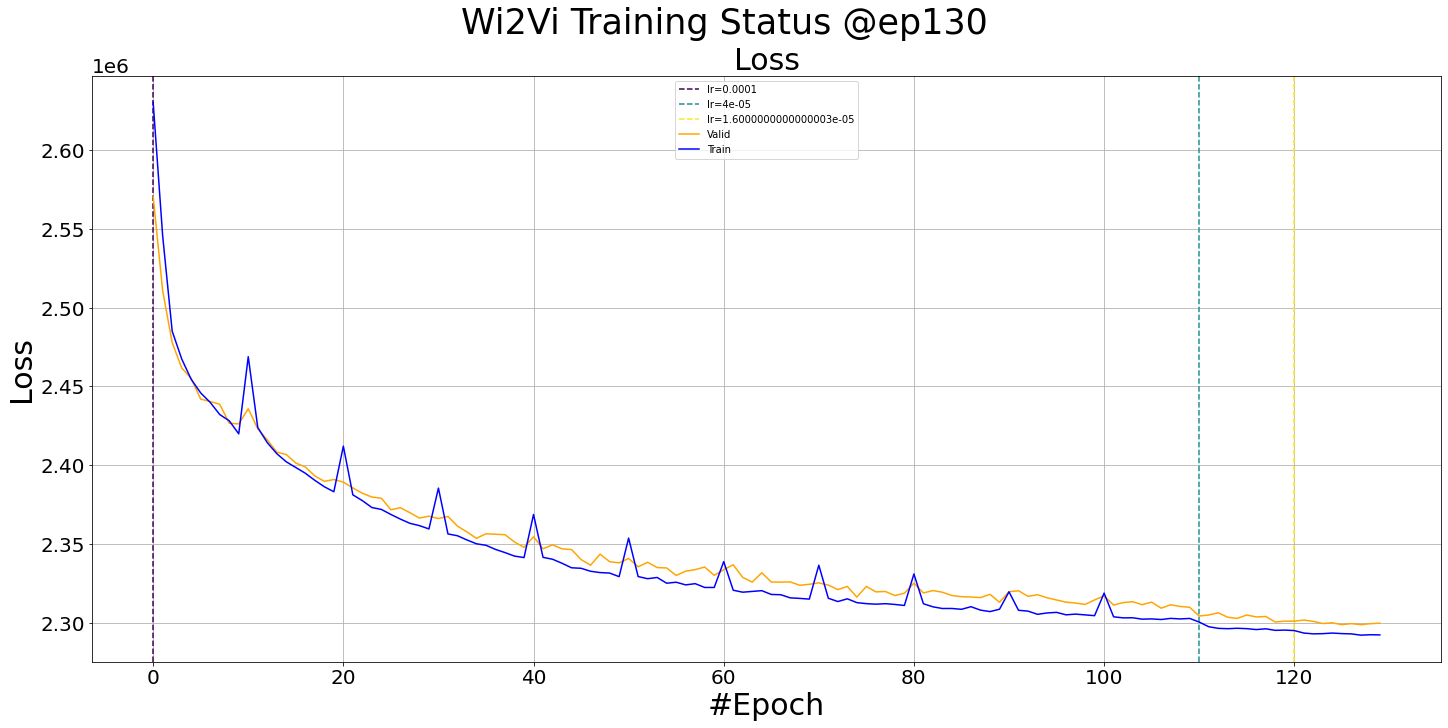

CompModel: epoch=9/10, batch=76/95,loss=2293517.55
Total training time: 282.5374732017517 sec
CompModel: test=76/95, loss=35718.81640625
Test finished. Average loss={'LOSS': 35801.66195004112}


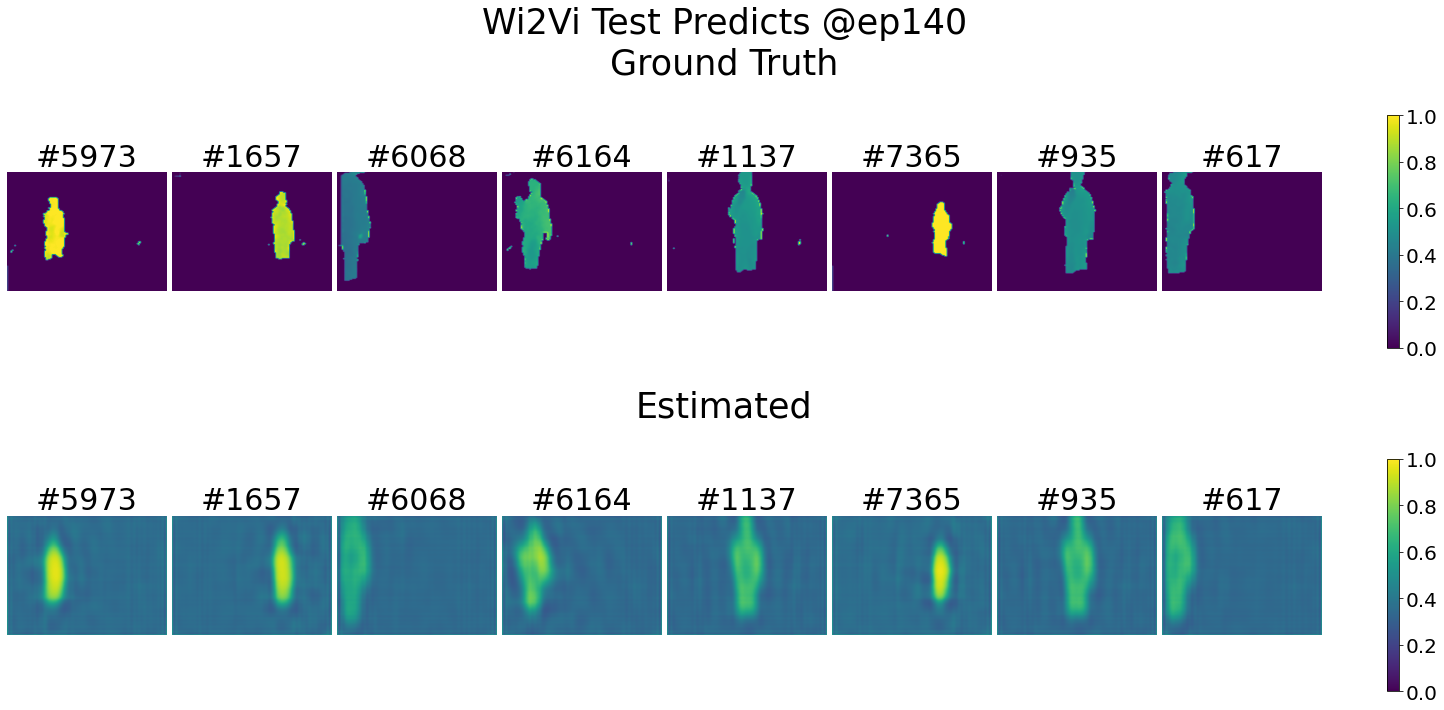

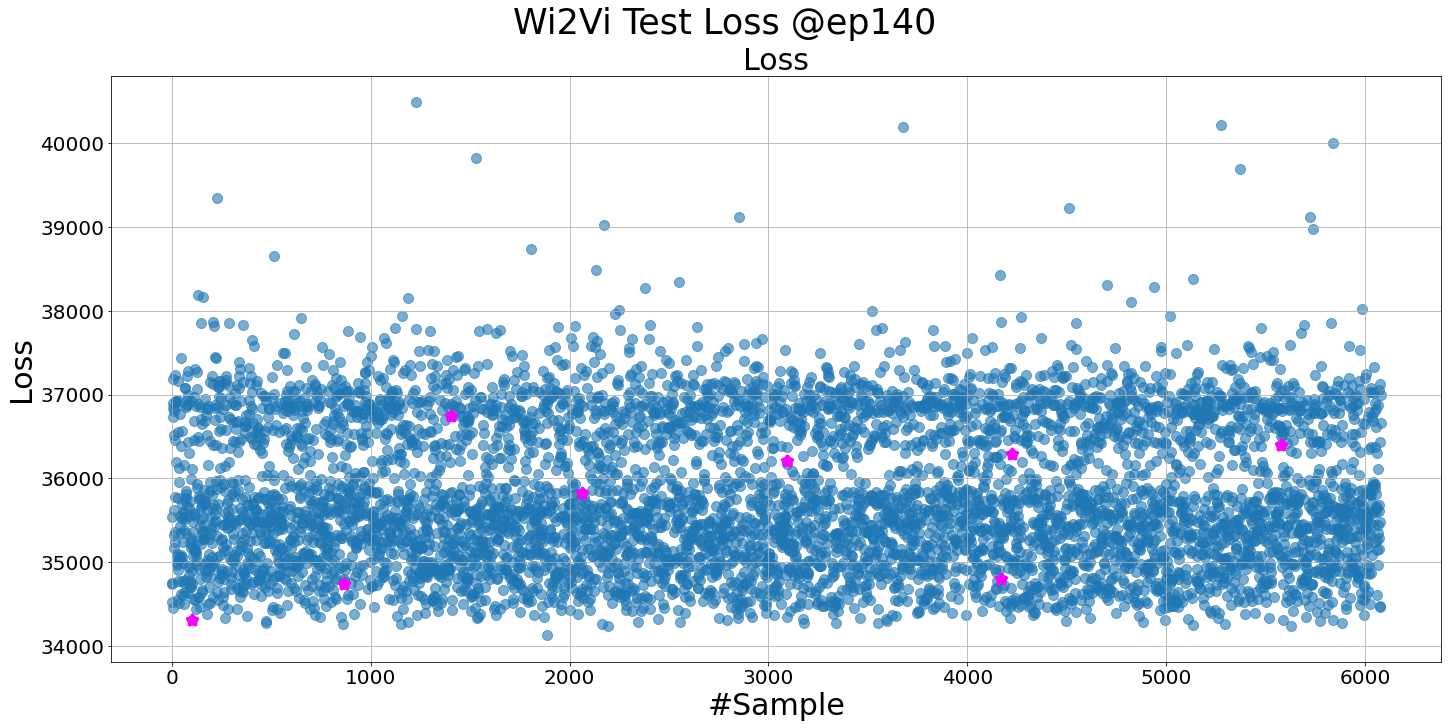

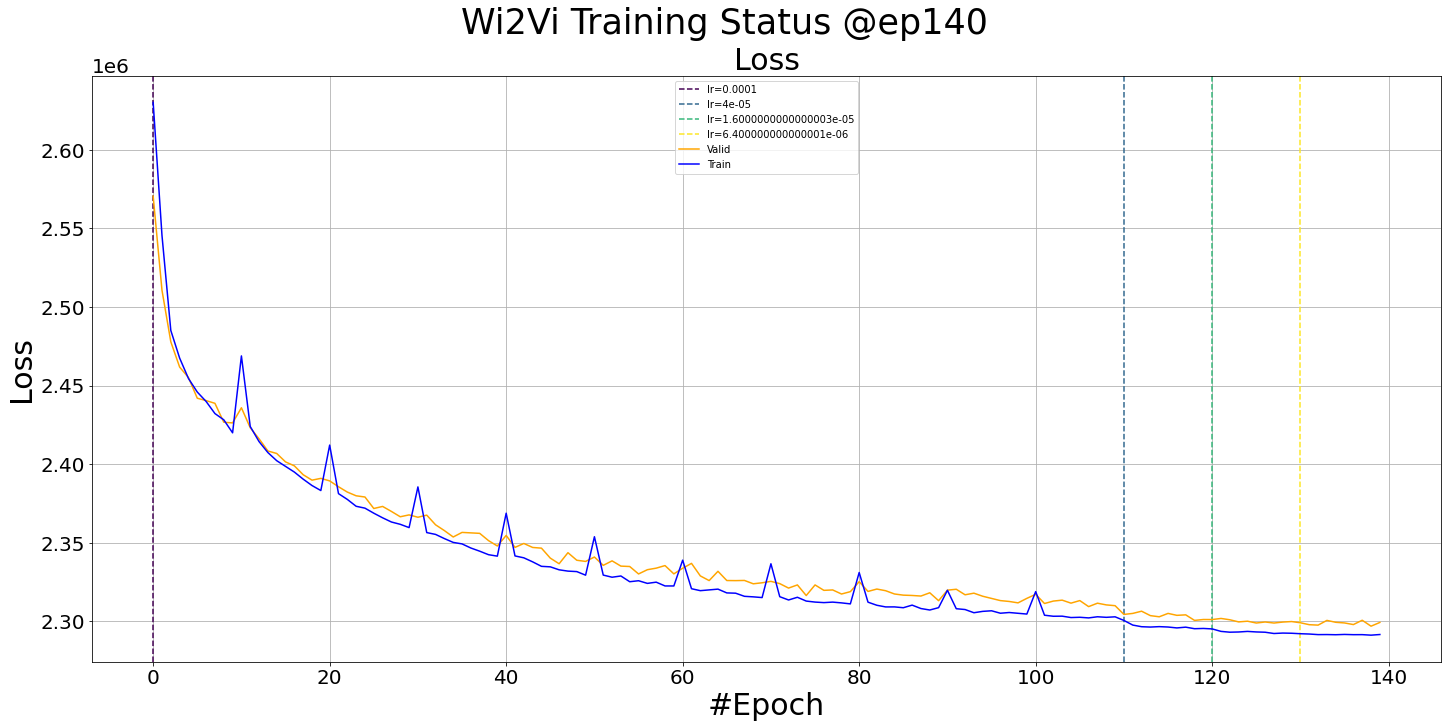

CompModel: epoch=9/10, batch=76/95,loss=2286108.05
Total training time: 282.59954738616943 sec
CompModel: test=76/95, loss=36406.83203125
Test finished. Average loss={'LOSS': 35785.81024683902}


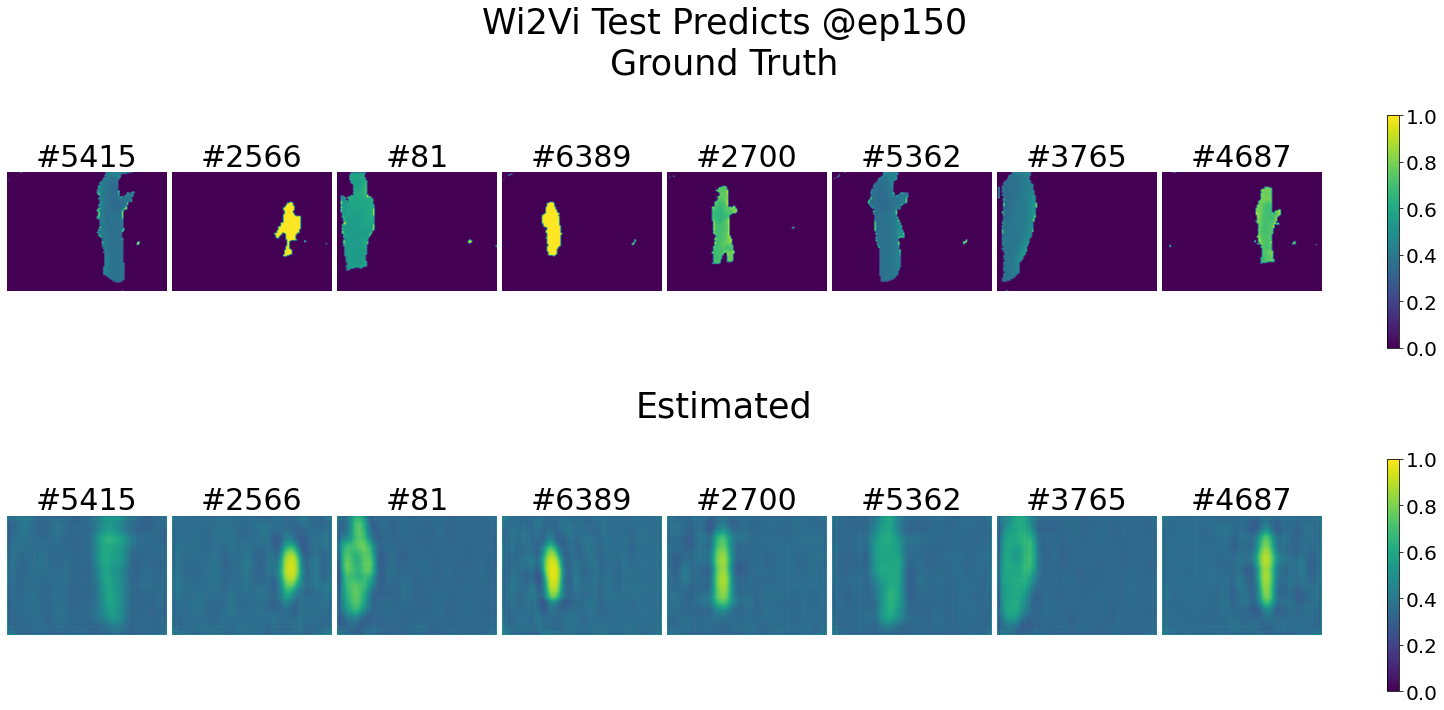

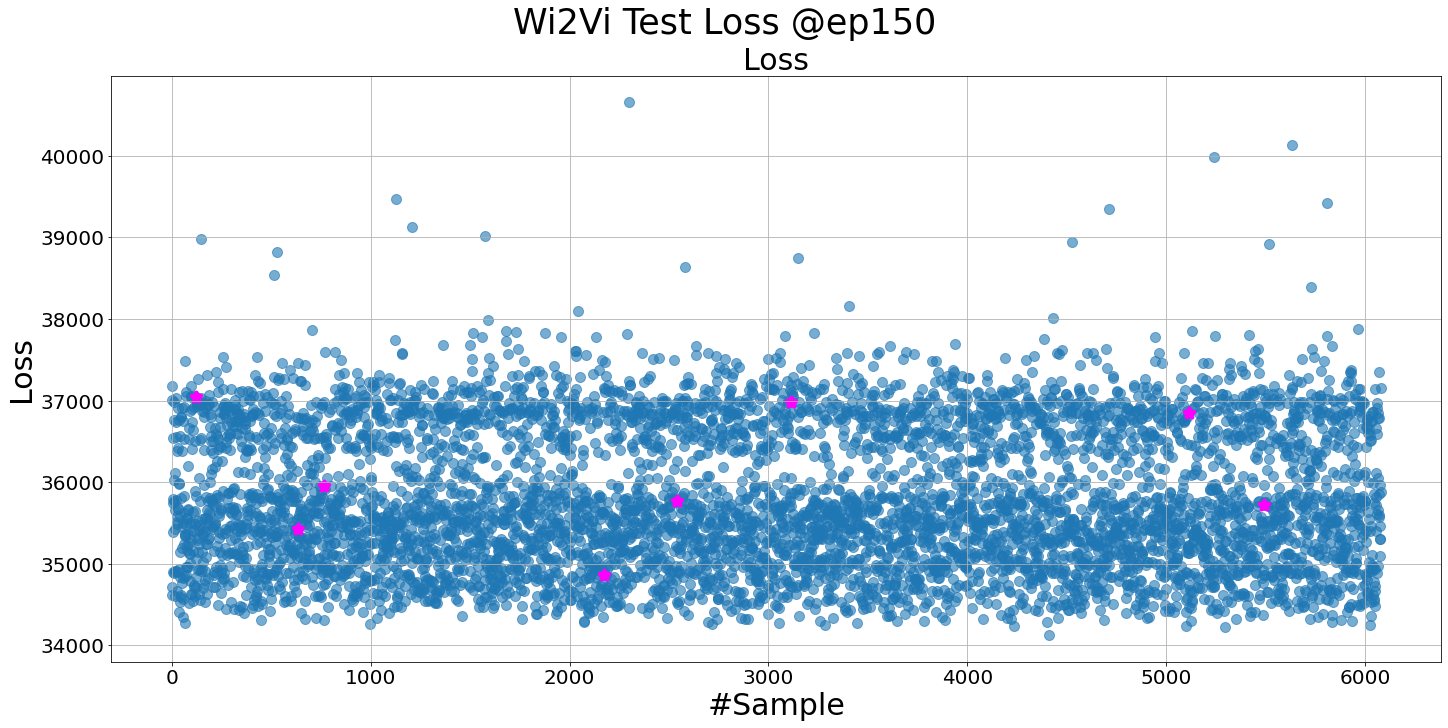

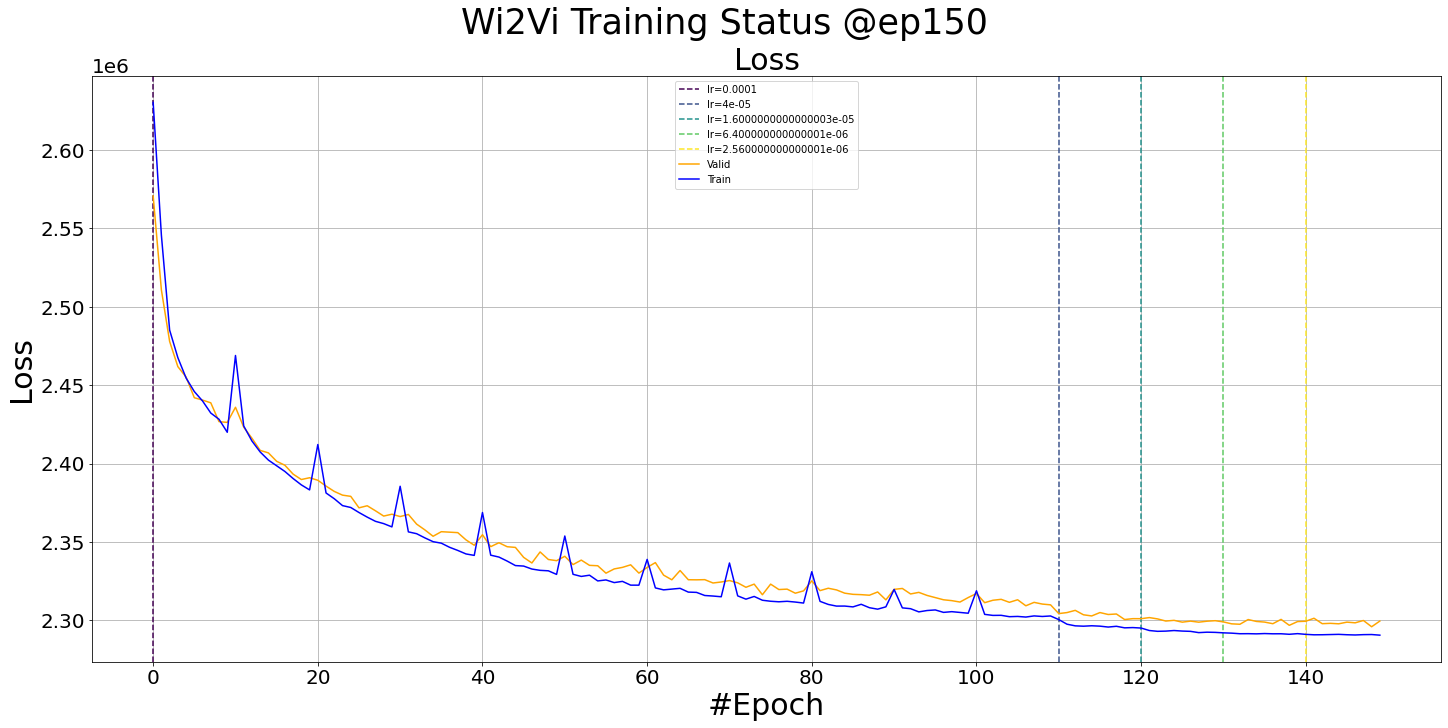

CompModel: epoch=9/10, batch=76/95,loss=2285446.55
Total training time: 280.3031930923462 sec
CompModel: test=76/95, loss=35245.34375375
Test finished. Average loss={'LOSS': 35790.70150596217}


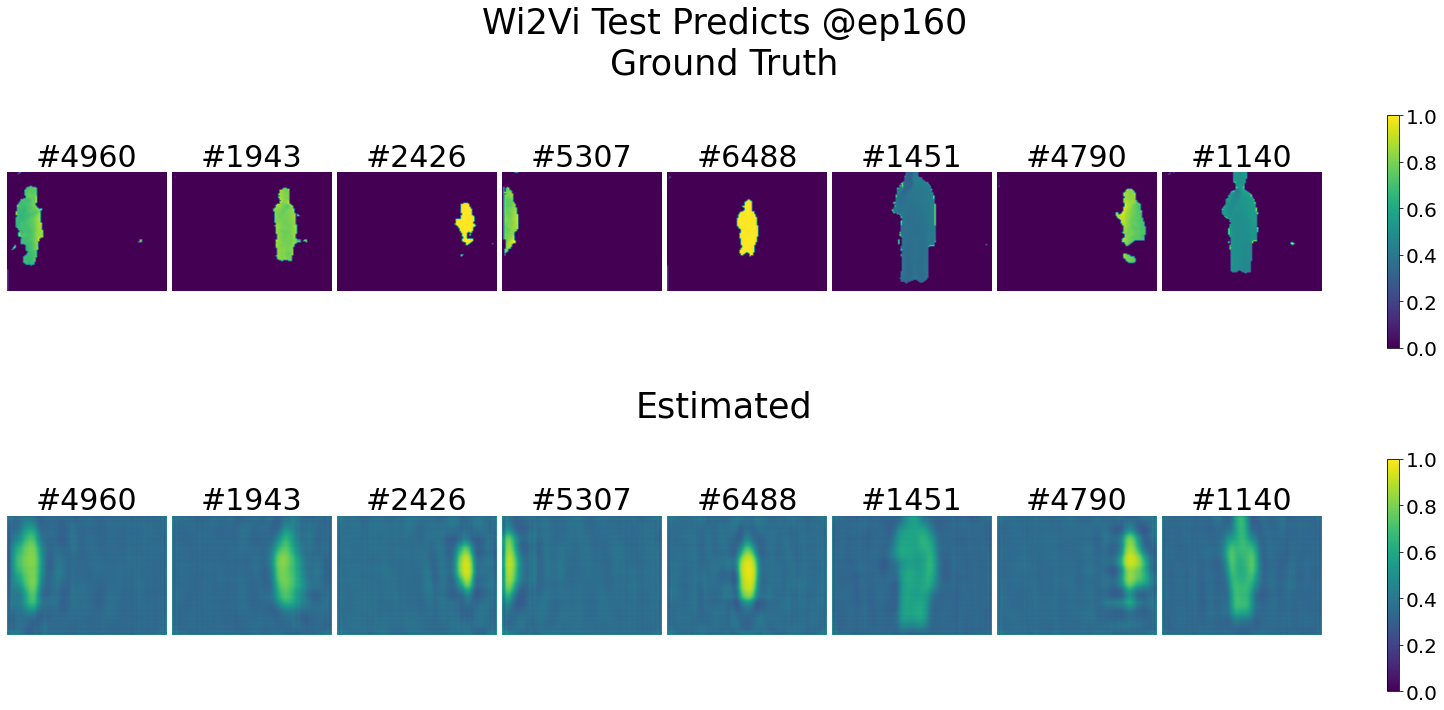

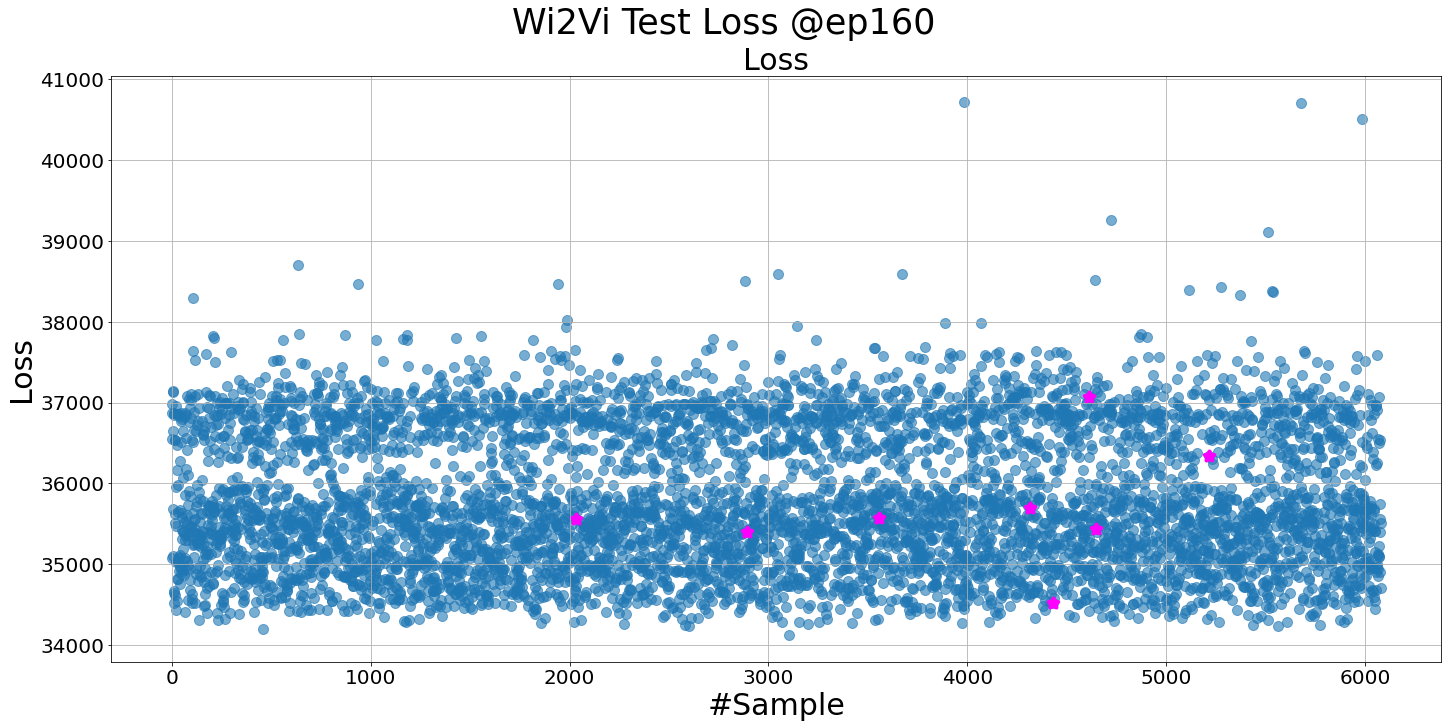

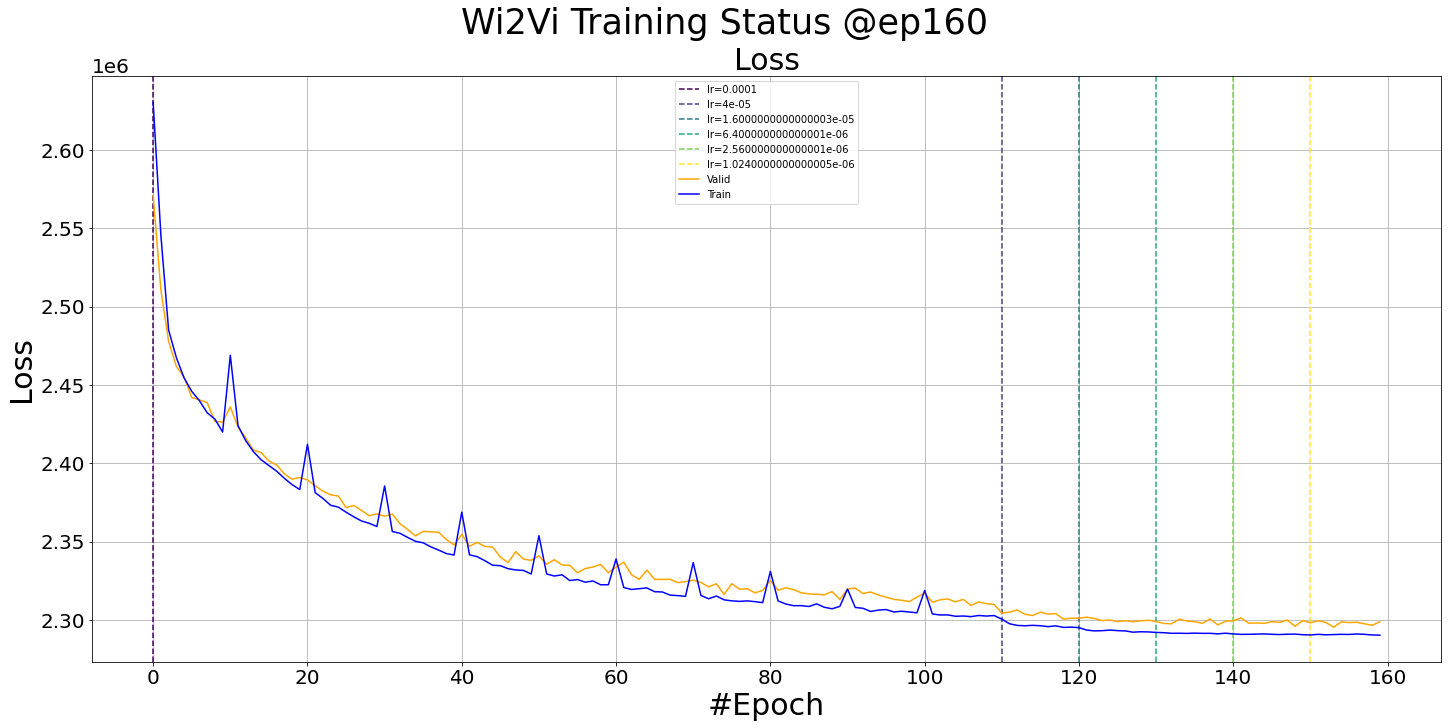

CompModel: epoch=9/10, batch=76/95,loss=2298489.55
Total training time: 278.45274567604065 sec
CompModel: test=76/95, loss=35650.68359375
Test finished. Average loss={'LOSS': 35786.24242007607}


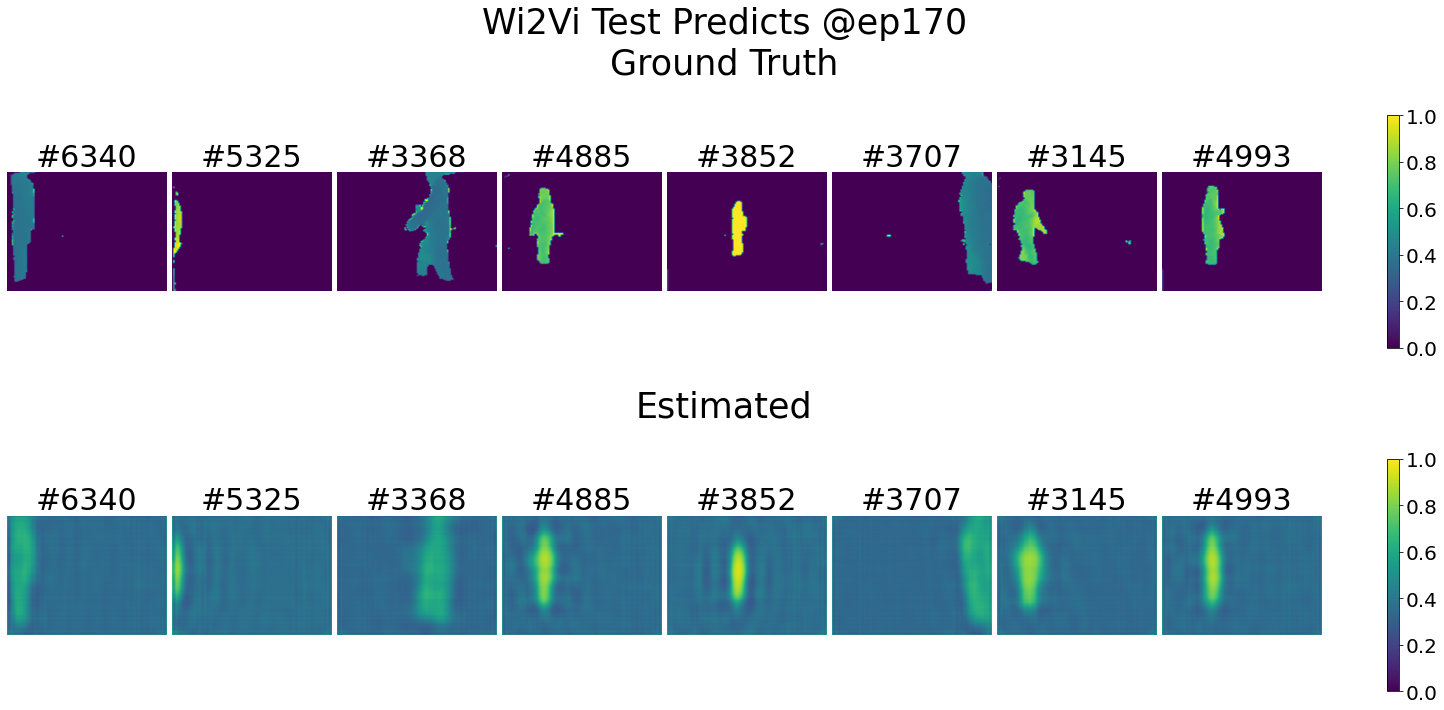

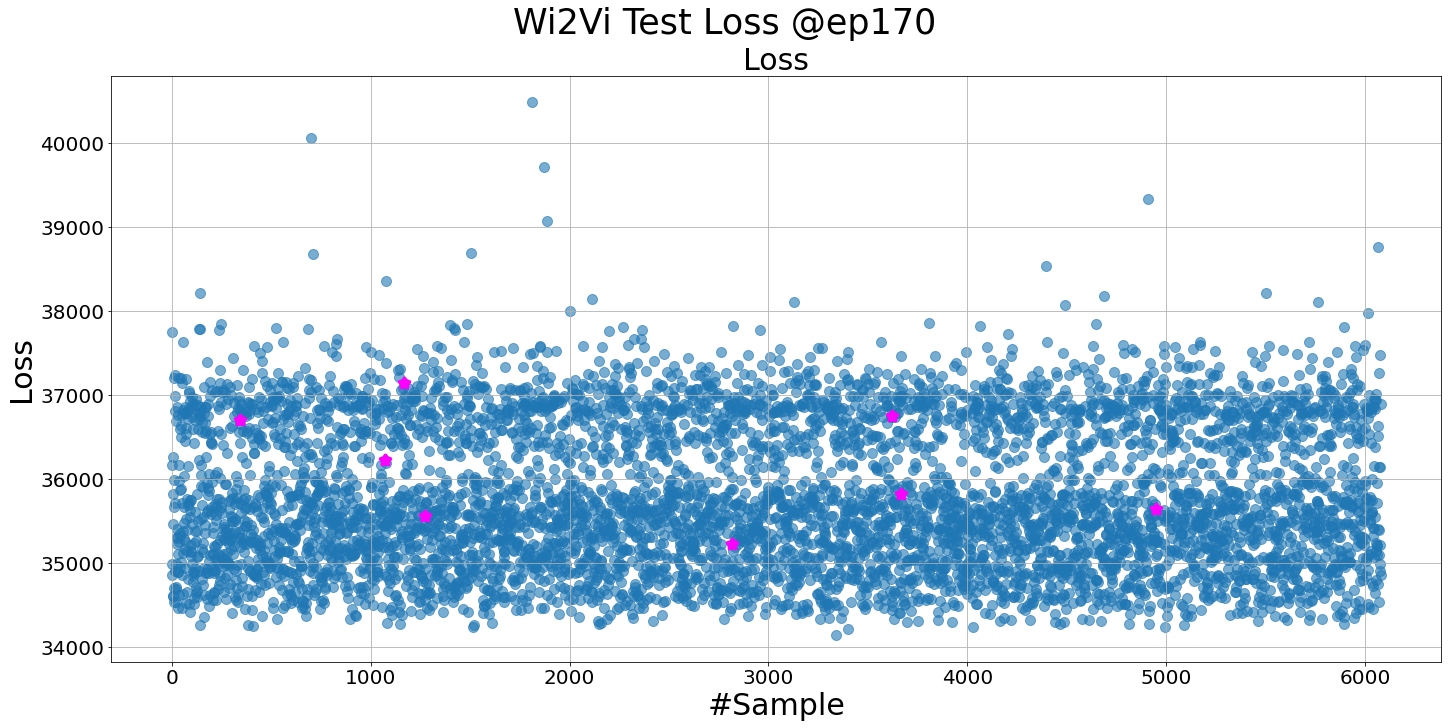

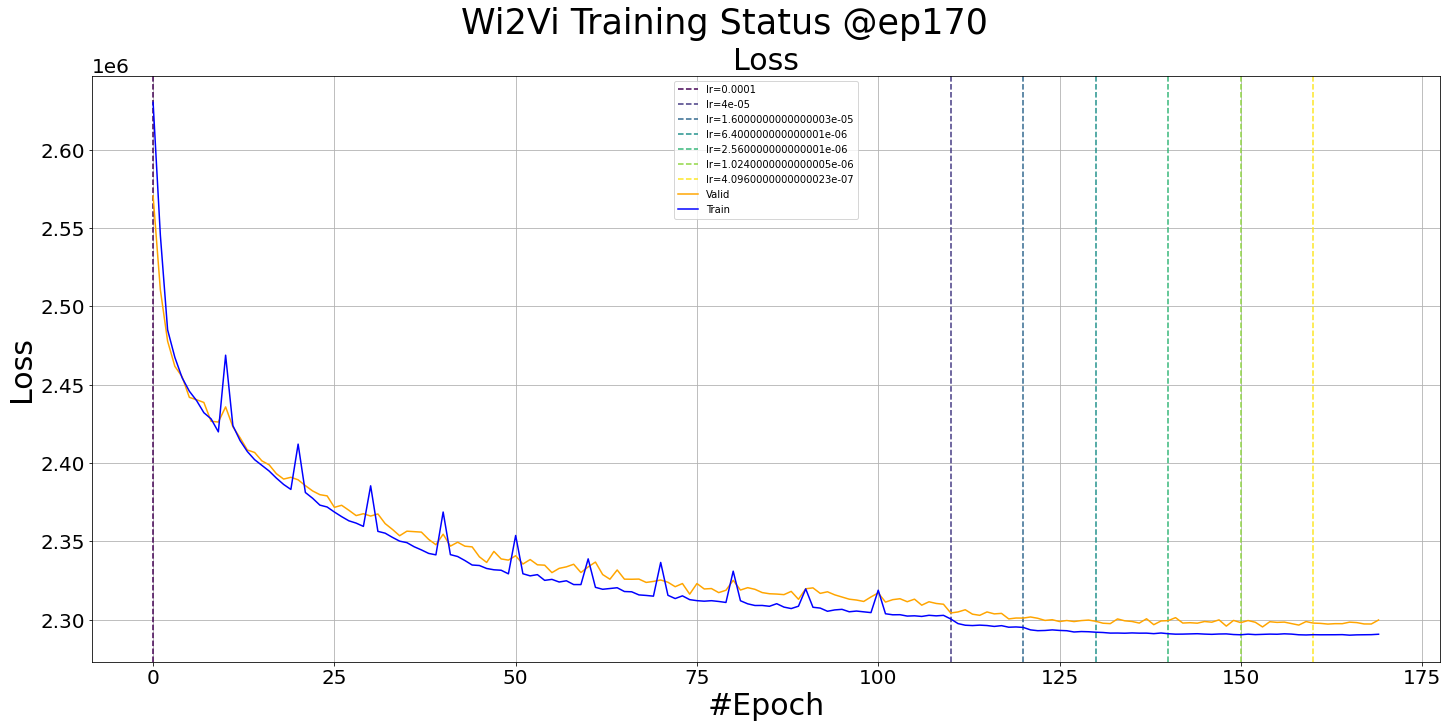

CompModel: epoch=9/10, batch=76/95,loss=2281974.25
Total training time: 281.73421573638916 sec
CompModel: test=76/95, loss=35123.81640625
Test finished. Average loss={'LOSS': 35789.65611186781}


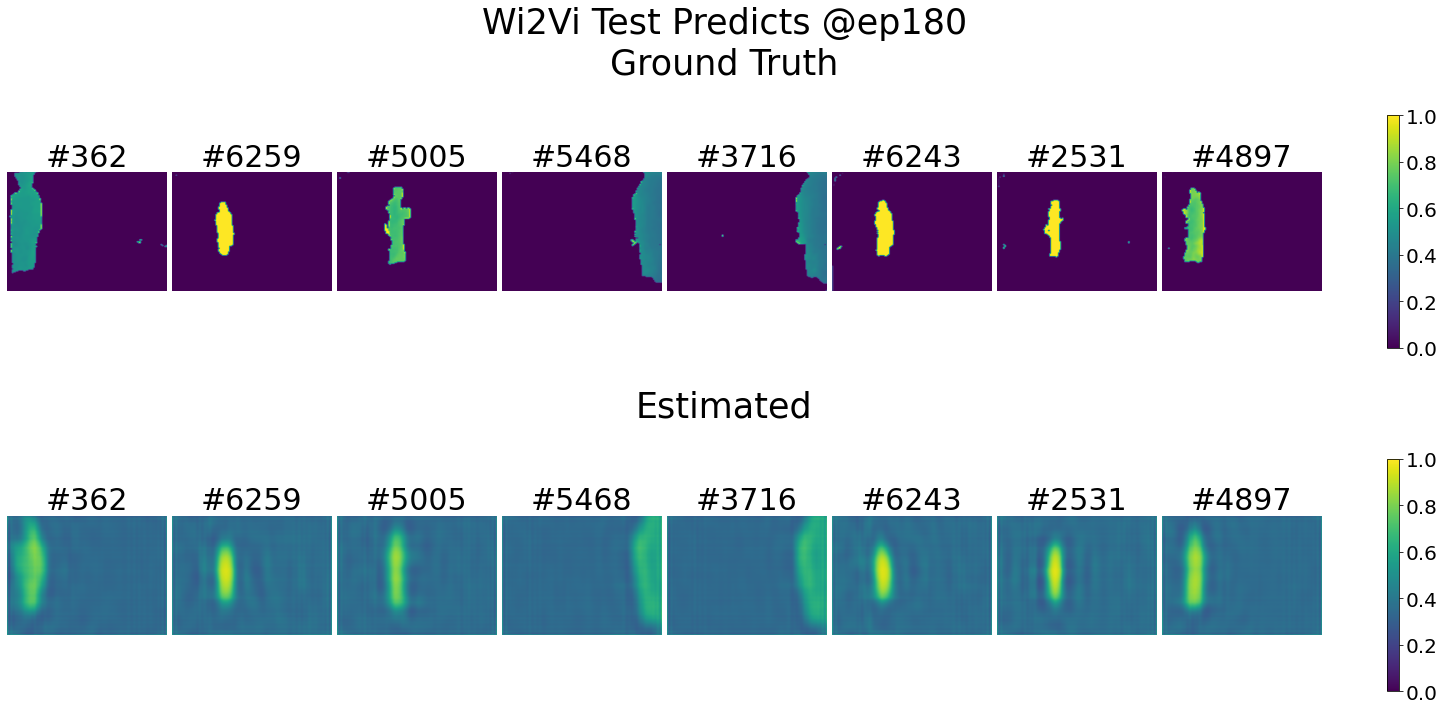

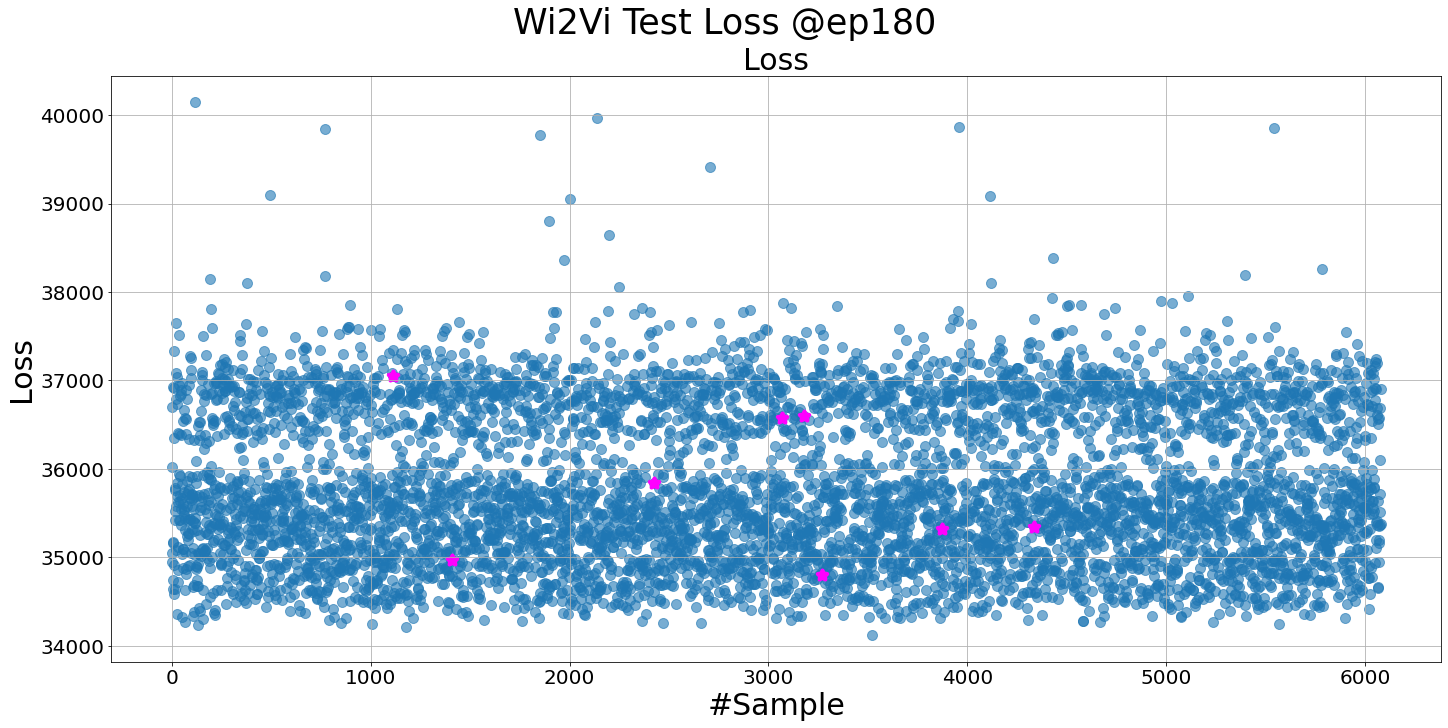

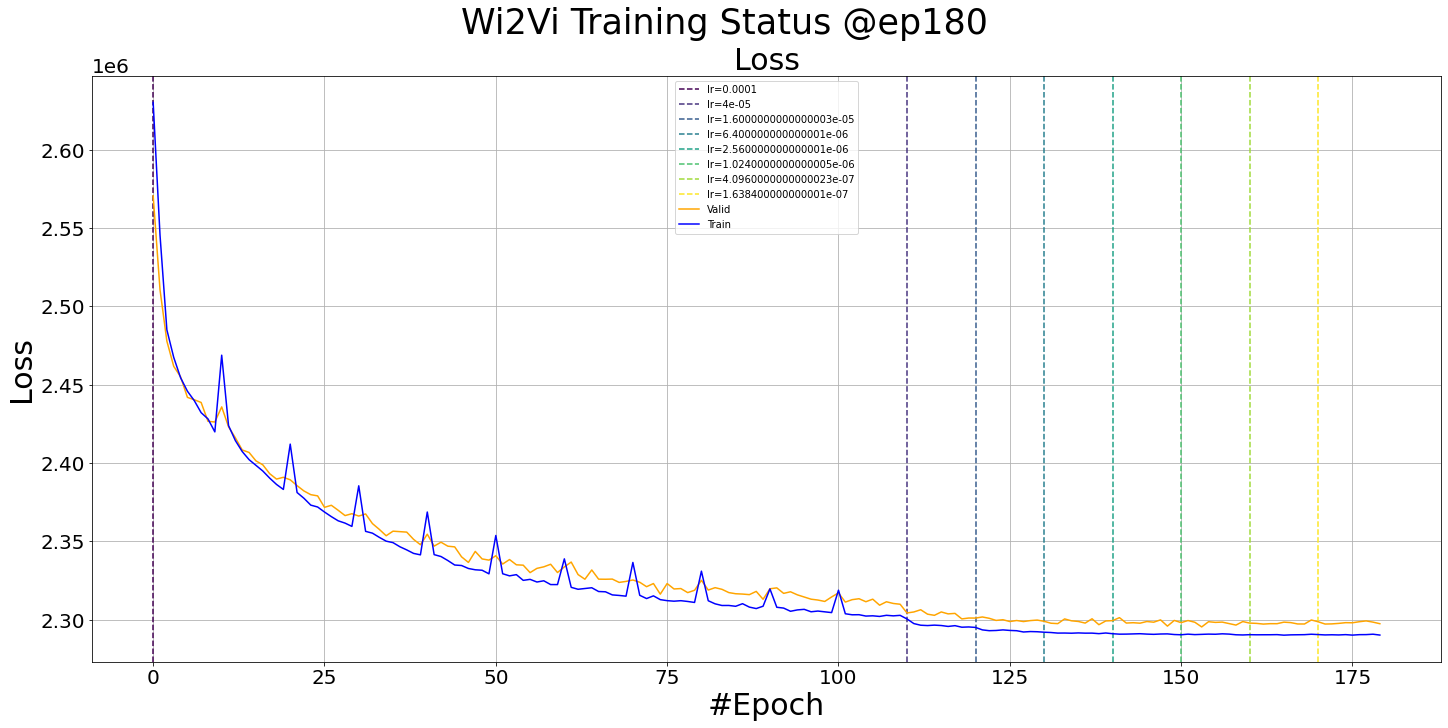

CompModel: epoch=9/10, batch=76/95,loss=2280741.75
Total training time: 281.9047405719757 sec
CompModel: test=76/95, loss=37185.44140625
Test finished. Average loss={'LOSS': 35789.47095433286}


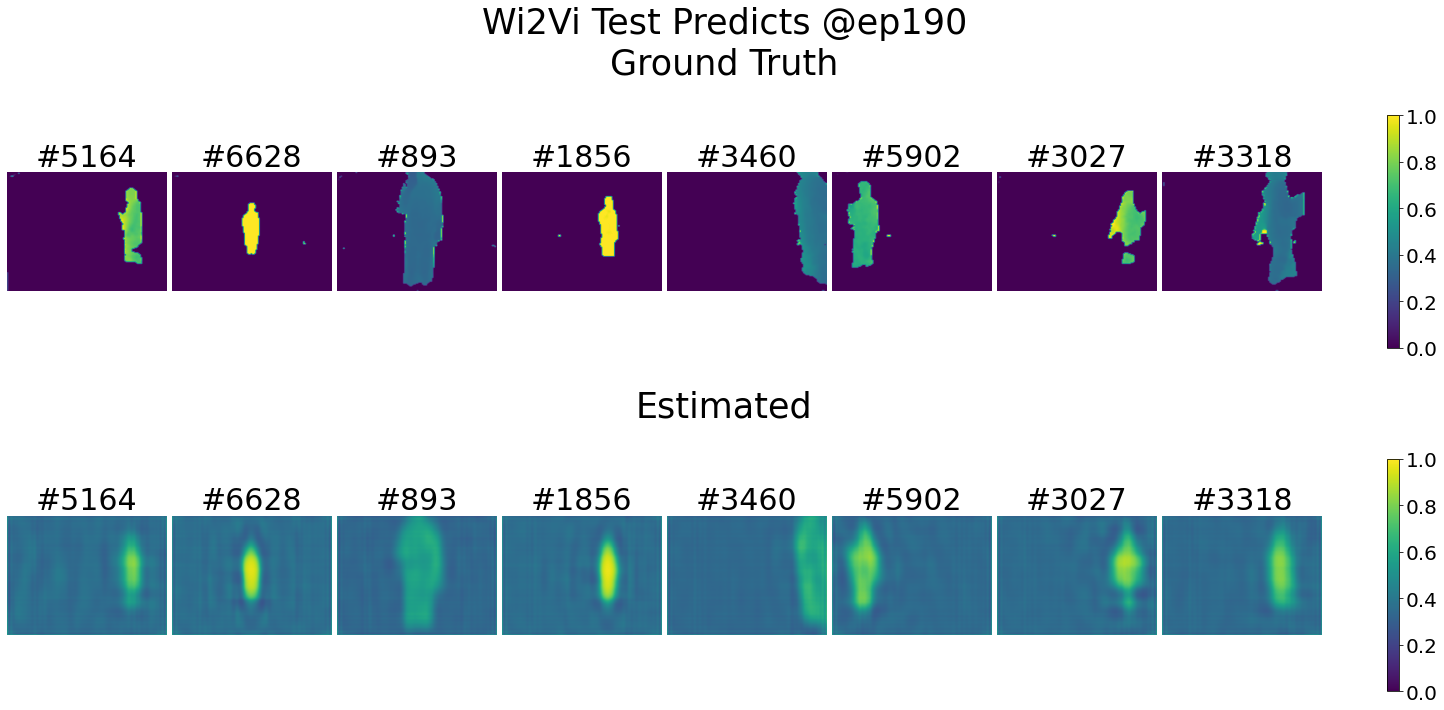

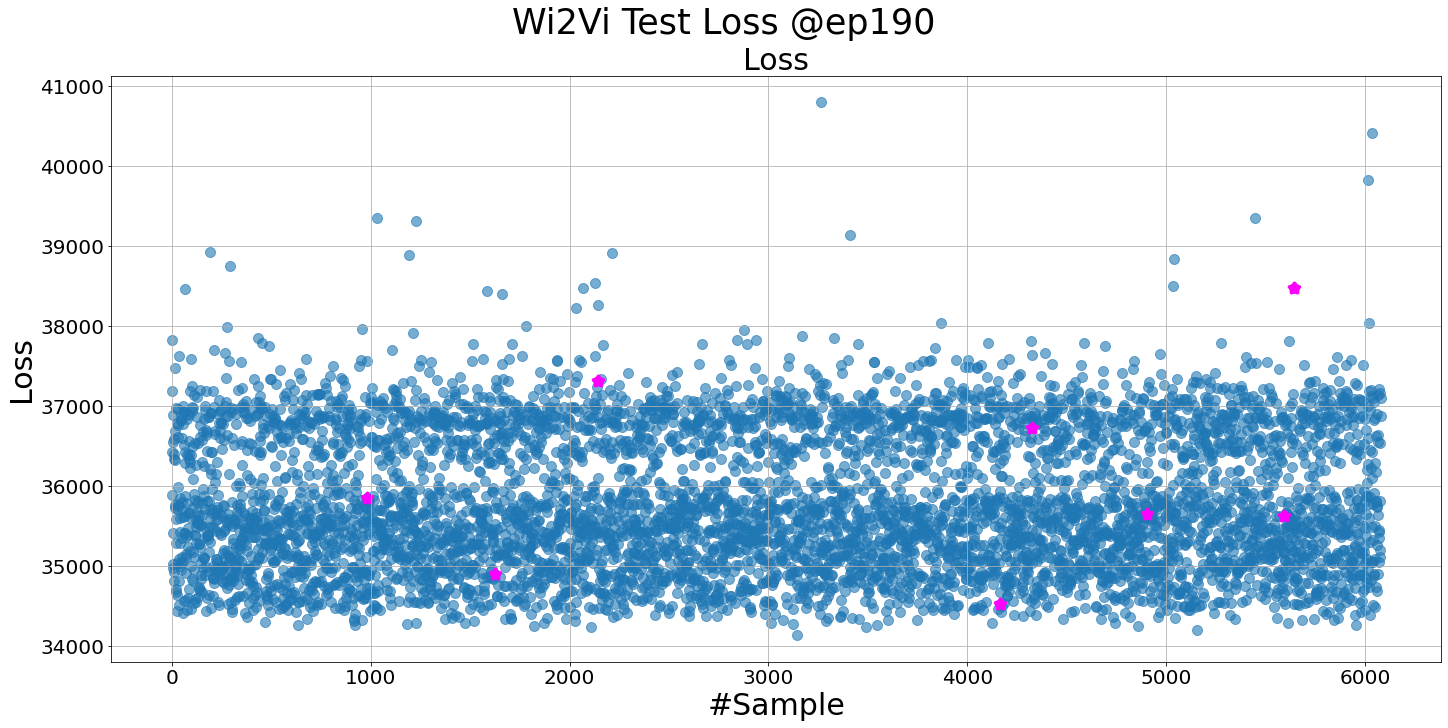

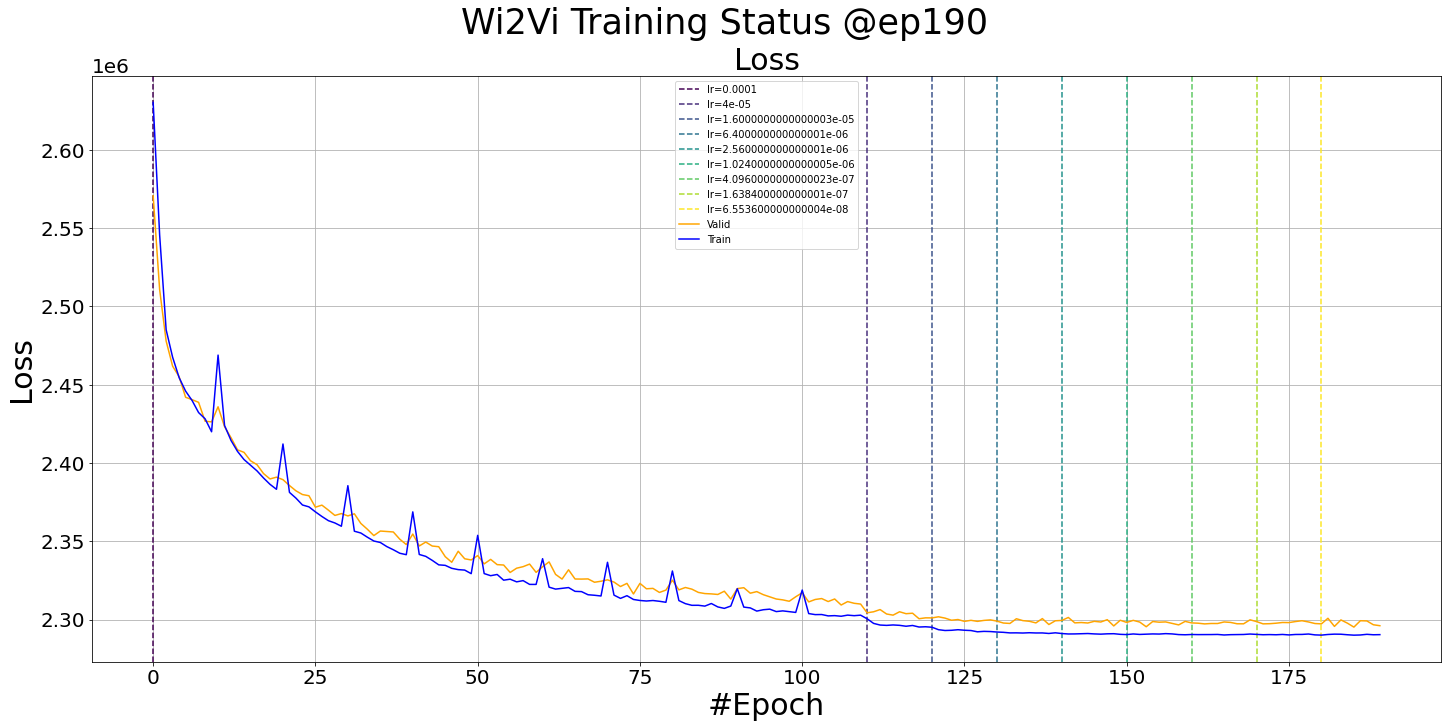

CompModel: epoch=9/10, batch=76/95,loss=2291201.55
Total training time: 280.39536929130554 sec
CompModel: test=76/95, loss=35783.70703125
Test finished. Average loss={'LOSS': 35790.20907175165}


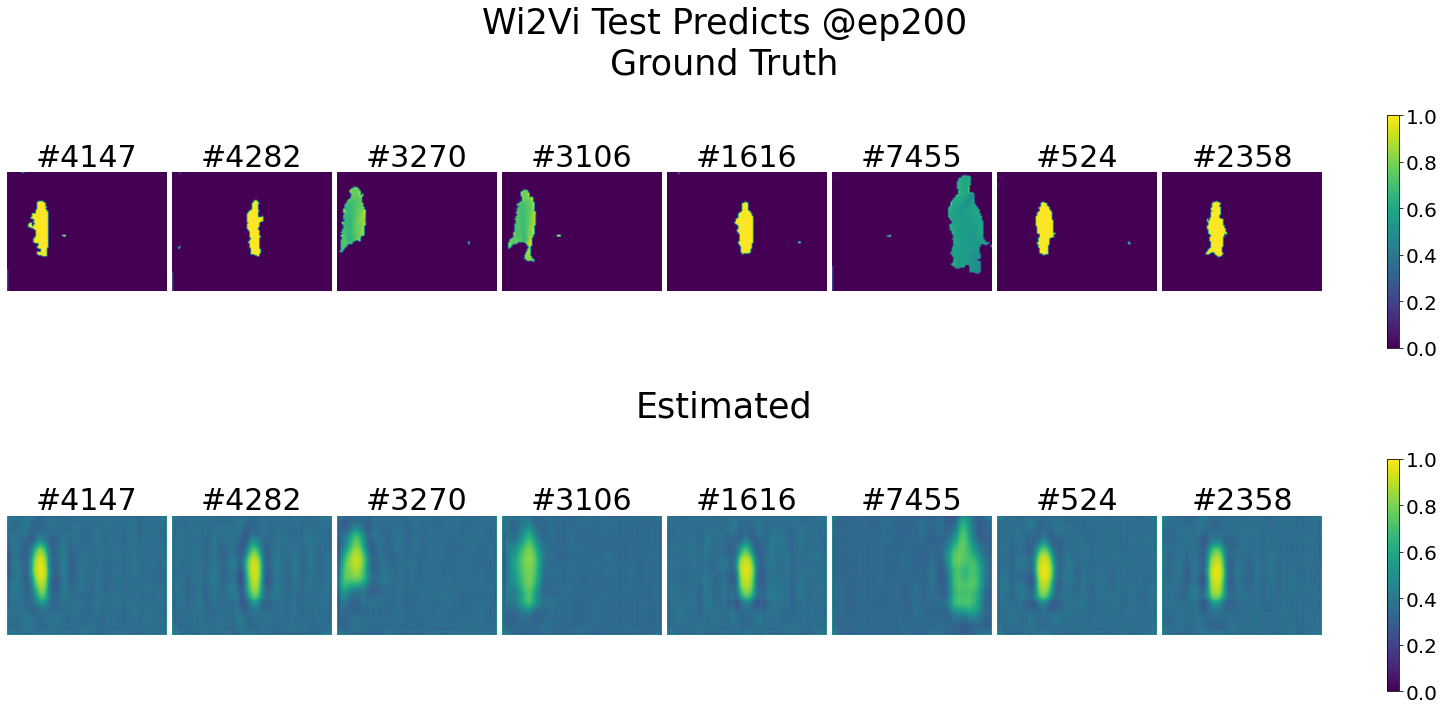

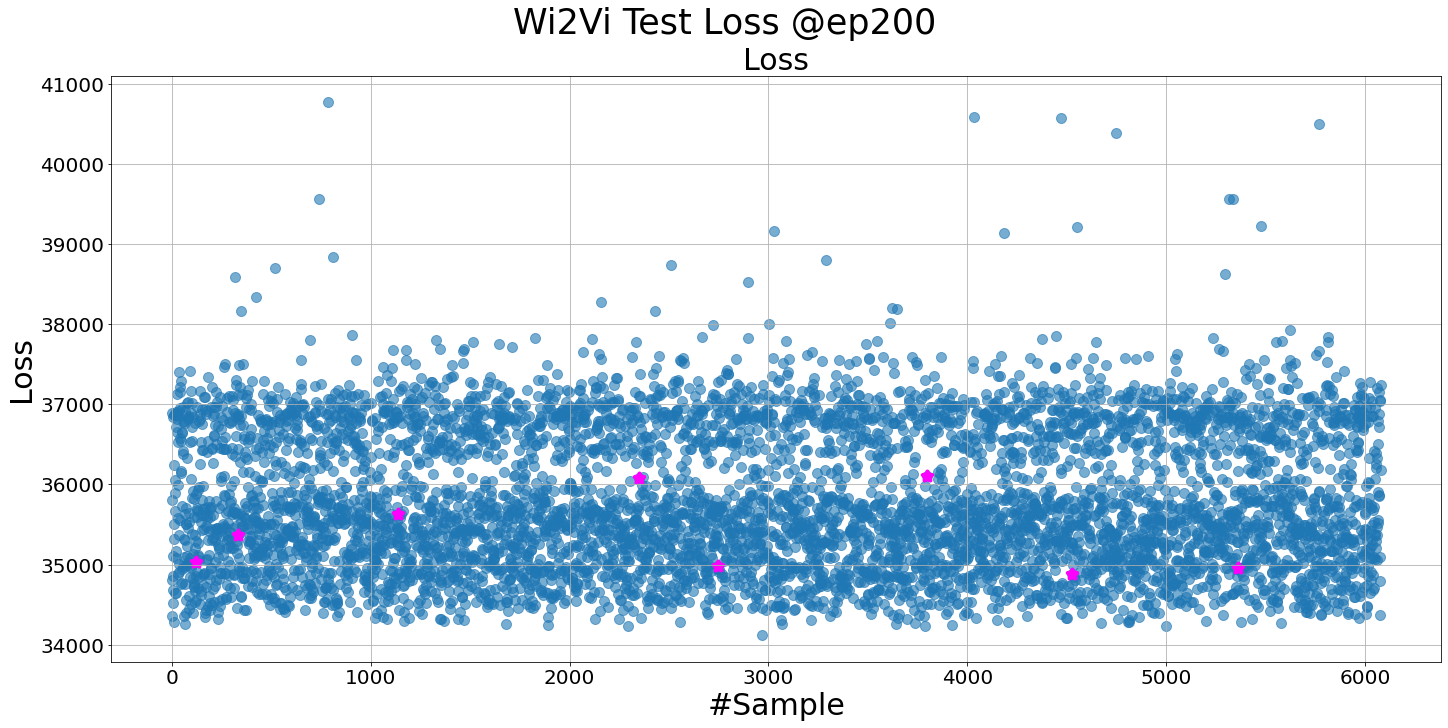

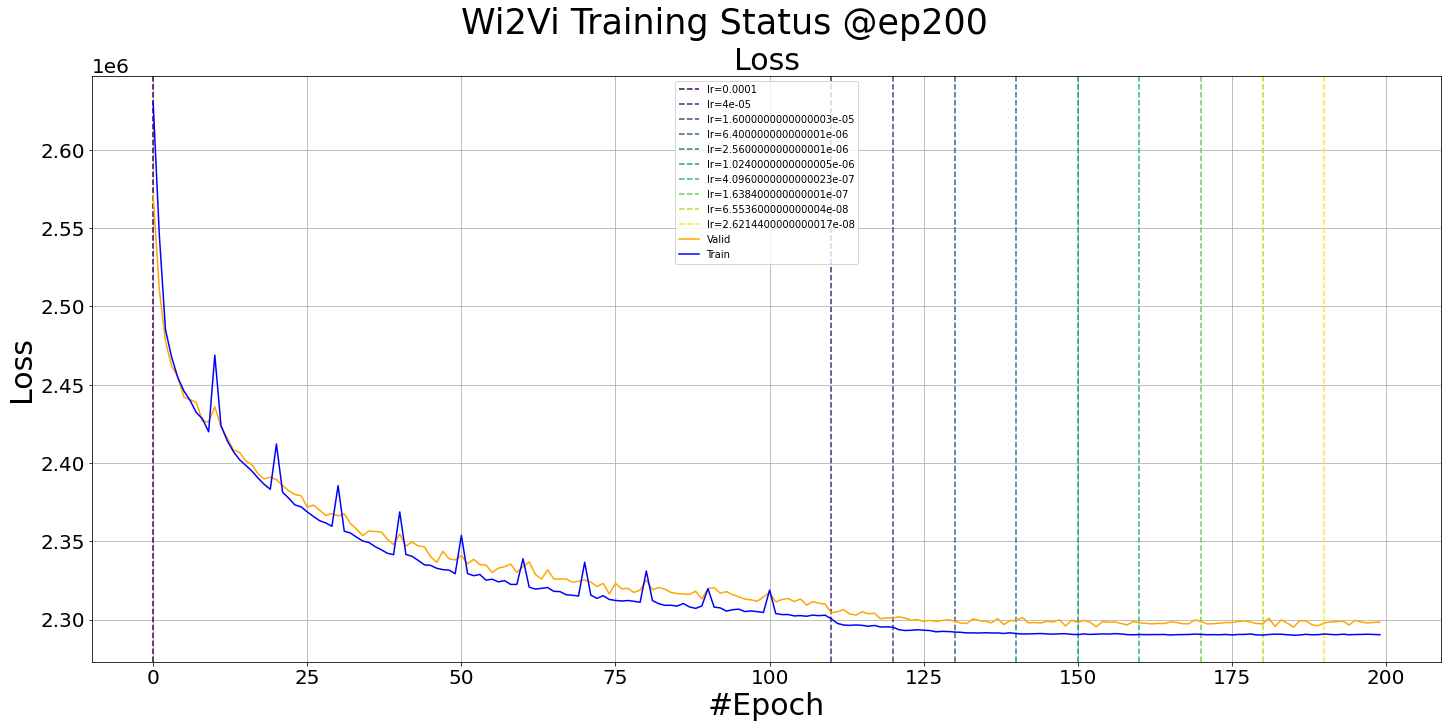


Schedule Completed!


In [7]:
# Training and Testing
trainer.scheduler(turns=10, lr_decay=True, autosave=True, notion='0829r1')

In [9]:
print(len(trainer.test_loss['LOSS']))
print(len(trainer.test_loss['IND']))

6080
12160


In [10]:
trainer.save_all_params(notion='0829r1')

PermissionError: [Errno 13] Permission denied: '/0829r1'

In [11]:
        torch.save(trainer.model.state_dict(),
                   f"../saved/{'0829r1'}/{'0829r1'}_{trainer.model}_{trainer.current_title()}.pth")